# Analiza podatkov o vinih
V tej datoteki analiziram podatke o vinih.

## Predpriprava
Najprej naložim knjižnico pandas in datoteki .csv.
Podatkov je veliko, zato bomo njihov prikaz s tabelami omejili.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
vina = pd.read_csv('vina.csv', index_col = 'id')
poskuševalci = pd.read_csv('poskuševalci.csv', index_col = 'sommelier')
pd.options.display.max_rows = 20

Najprej si poglejmo nekaj podatkov o vinih.

In [2]:
vina.head(n=10)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier
id,,,,,,,,,
277308,Alpha Omega 2013 Stagecoach Vineyard Cabernet ...,99,"Dark and vibrant in color, this is a stellar, ...",225.0,US,14.5,750 ml,Red,Virginie Boone
279510,Alpha Omega 2013 Beckstoffer Las Piedras Caber...,98,This is a bright concentrated wine that's velv...,225.0,US,14.4,750 ml,Red,Virginie Boone
278957,Alpha Omega 2013 Proprietary Red (Napa Valley),98,"This blends 61% Cabernet Sauvignon, 32% Merlot...",98.0,US,14.5,750 ml,Red,Virginie Boone
277484,Hall 2014 Rainin Vineyard Cabernet Sauvignon (...,98,From the iconic site atop the mighty mountain ...,325.0,US,15.6,750 ml,Red,Virginie Boone
279508,Alpha Omega 2013 Beckstoffer Missouri Hopper C...,98,"Luxurious in brick, clove and a wealth of blac...",225.0,US,14.6,750 ml,Red,Virginie Boone
279176,Château Pichon Longueville 2015 Pauillac,98,This is one of the great successes of this vin...,137.0,France,13.5,750 ml,Red,Roger Voss
278730,Louis Jadot 2015 Clos de la Roche,98,This grand vineyard is one of the jewels of Mo...,330.0,France,13.5,750 ml,Red,Roger Voss
279167,Château Léoville Barton 2015 Saint-Julien,97,"Rich, generous and elegant, this is a very den...",NaN,France,13.0,750 ml,Red,Roger Voss
278725,Louis Jadot 2015 Chapelle-Chambertin,97,"Produced from vines owned by Louis Jadot, this...",240.0,France,13.5,750 ml,Red,Roger Voss


Ker smo za vsako vino zajeli tudi poskuševalca, je prišlo do podvojitev (potrojitev ipd.) poskuševalcev. Preden nadaljujemo, to uredimo.

In [3]:
# Odstranimo duplikate.
poskuševalci = poskuševalci.drop_duplicates(keep='first', inplace=False)
poskuševalci.head(n=20)

# Počistimo podatke.
poskuševalci = poskuševalci.drop('Carrie Dykes')

# Dodamo pobrisano v pravi obliki.
carrie = {'sommelier': ['Carrie Dykes']}
df = pd.DataFrame(data=carrie)
df = df.set_index('sommelier')
poskuševalci = poskuševalci.append(df)

poskuševalci.head(n=20)

,reviews1,reviews2,reviews3
sommelier,,,
Virginie Boone,'California',NaN,NaN
Roger Voss,'Portugal','France',NaN
Kerin O’Keefe,'Italy',NaN,NaN
Christina Pickard,'Australia','New Zealand',NaN
Paul Gregutt,'Oregon','Canada',NaN
Anna Lee C. Iijima,'Germany','the Rhône Valley',NaN
Michael Schachner,'Argentina','Chile','Spain'
Mike DeSimone,'Israel','Asia','Africa'
Jeff Jenssen,'Europe',NaN,NaN


Opazimo, da poskuševalcev ni veliko, vendar so podatki glede na spletno stran, s katere smo pobrali podatke, pravilni.

## Analiza
Za začetek si oglejmo, katere vrste vin sploh imamo in kako so razporejene.

In [34]:
vina_po_kategorijah = vina.groupby('category')

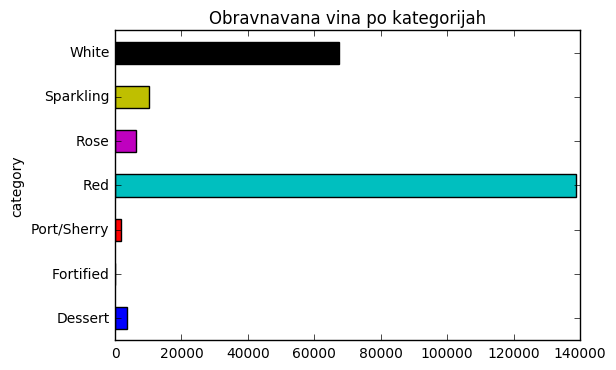

In [36]:
vina_po_kategorijah.size().plot(kind='barh', title='Obravnavana vina po kategorijah', stacked=True)

In [22]:
vina_po_kategorijah.mean()

,points,price,alcohol
category,,,
Dessert,89.665027,47.760607,12.324687
Fortified,89.491525,49.000000,17.188696
Port/Sherry,89.192286,53.729334,19.252684
Red,88.331412,38.067086,14.069436
Rose,86.398977,17.287465,12.939917
Sparkling,88.140547,40.535412,12.057330
White,87.680925,24.654345,13.162324
